In [118]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

testName = "final/1 to 1.25_F4_test_growing(20,200,50,2000)"
mat = scipy.io.loadmat('./'+ testName)
experimentProposals = mat['experimentBestProposals'][0]
experimentFits = mat['experimentBestFits'][0]
experimentProfiles = mat['experimentBestShapes'][0]
freq_cut = mat['cutFreq'][0][0]
max_generations = mat['maxGen'][0][0]
total_proposals = len(experimentProposals[0][0])
total_experiments = len(mat['experimentBestShapes'][0])
print("Cut freq: "+str(freq_cut))
print("Max gen: "+str(max_generations))
print("Proposals/gen: "+str(total_proposals))
print("Total experiments: "+str(total_experiments))

dataset = []


for iExperiment in range(len(experimentProposals)):
    nValue = []
    fit = []
    profileABH = []
    runout = experimentProposals[iExperiment][0]
    for iGen in range(len(runout)):
        experiment = runout[iGen][0]
        nValue.append(experiment[1][0][0])
        fit.append(experimentFits[iExperiment][0][iGen][0][0])
        profileABH.append(experimentProfiles[iExperiment][0][iGen][0])
    experiments = {
        'nValues': nValue,
        'fit': fit,
        'profileABH':profileABH
    }
    dataset.append(experiments)


Cut freq: 2000
Max gen: 200
Proposals/gen: 202
Total experiments: 20


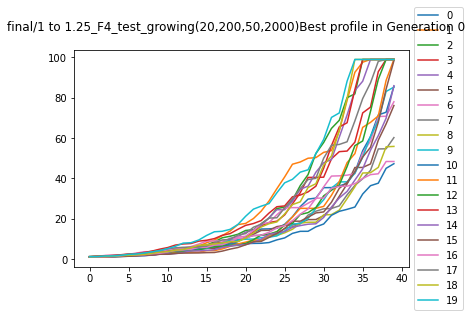

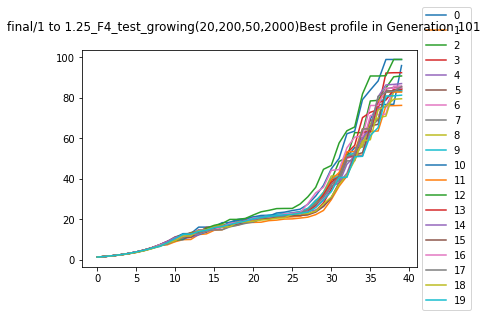

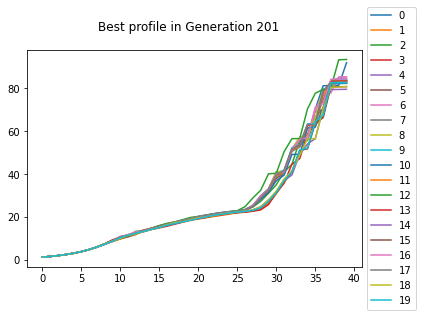

In [119]:
totalGen = len(experimentProfiles[0][0])

fig, (ax) = plt.subplots(1,1)
gen = 0
fig.suptitle(testName +'Best profile in Generation '+ str(gen))
current = 0
for experiment in experimentProfiles:
    for data in experiment[0][gen]:
        ax.plot(data)
    plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))

fig, (ax) = plt.subplots(1,1)
gen = int(totalGen*0.5)
fig.suptitle(testName +'Best profile in Generation '+ str(gen))
current = 0
for experiment in experimentProfiles:
    for data in experiment[0][gen]:
        ax.plot(data)
    plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))
    

fig, (ax) = plt.subplots(1,1)
gen = totalGen-1
fig.suptitle('Best profile in Generation '+ str(gen))
current = 0
for experiment in experimentProfiles:
    for data in experiment[0][gen]:
        ax.plot(data)
    plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))


In [120]:
def fit_line(points):
    r = np.polyfit([p[0] for p in points], [p[1] for p in points], 1)
    print(f"y = {r[0]:.2f}x + {r[1]:.2f}")

In [125]:
print(experimentProfiles[0][0][201][0])
dataProfile = []
gen = totalGen-1
for experiment in experimentProfiles:
    for data in experiment[0][gen]:
        dataProfile.append(data)
        
profileMean = np.mean(dataProfile, axis=0)
print(profileMean)

[ 1.24878901  1.56020805  1.94705368  2.43368763  3.04103129  3.80095269
  4.74744835  5.9042116   7.14407452  8.62543077 10.55020007 11.47720968
 11.82376296 13.9957524  14.38710867 15.66904341 16.41903668 17.16046889
 18.19995817 19.42660081 19.9856235  20.83370229 21.45831115 21.92080787
 22.31965182 22.82601724 23.49632487 25.41712172 29.83863884 32.8878433
 40.5935381  41.64602516 51.77537712 56.46751314 56.47185903 70.37588717
 81.23897961 81.40169493 81.4554637  92.01332155]
[ 1.24956685  1.56137411  1.95128839  2.43874536  3.04772004  3.80865277
  4.759421    5.94336435  7.37381909  8.83242144 10.3177561  11.40271022
 12.43438111 13.50228783 14.48724161 15.48426957 16.39925694 17.2654772
 18.14094069 19.02052611 19.75827515 20.41471638 21.0313498  21.57409248
 22.04788203 22.49301275 23.09248845 24.6705512  27.7357674  31.22238502
 36.90448307 40.22313061 48.23839366 53.11805576 58.42384599 65.60688883
 73.63139128 82.0579956  83.46580752 84.02642932]


          10             9             8             7             6
-2.7e-11 x  + 5.297e-09 x - 4.431e-07 x + 2.055e-05 x - 0.0005769 x
            5          4          3         2
 + 0.01004 x - 0.1068 x + 0.6516 x - 1.928 x + 2.472 x + 1.006


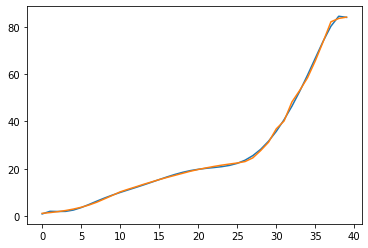

In [126]:

indexes = [x for x in range(40)]
profile = profileMean

z = np.polyfit(indexes,profile, 10)
generated = np.poly1d(z)

print(generated)

newGenerated = []
for i in range(40):
    newGenerated.append(generated(i))
    
fig, (ax) = plt.subplots(1,1)
ax.plot(newGenerated)
ax.plot(profile)

1250.25


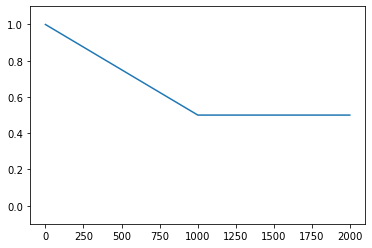

In [127]:
import numpy as np
import pprint as pp


def stepWeights(total, step):
    weights = np.ones(total)
    
    for i in range(total):
        if i < step:
            weights[i] -= (1-0.5)/step*i
        else:
            weights[i] = 0.5
    return weights

def linearWeights(total):
    weights = np.ones(total)
    for i in range(total):
        weights[i] -= (1/total)*i
    return weights

w = linearWeights(2000)
w = stepWeights(2000,1000)

print(sum(w))
fig, (ax) = plt.subplots(1,1)
ax.set_ylim(-0.1, 1.1)
ax.plot(w)